# Major_Evaluation Data Cleaning/Analysis Project

To begin the project, it is critical that we import all of the packages that the project will be using

In [68]:
#importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import settings

Now that we have all of the necessary packages imported, we should view what types of data files we will be handling

## Cleaning the data

### Uploading the data to dataframes and first impressions of the data

In [69]:
#create a list of all of our data file names
data_files = os.listdir(settings.Data_dir)
print data_files

['Bachelor_Degrees_Conferred.csv', 'degrees-that-pay-back.csv']


Take notice that the all of the data files are in a ".csv" format. 
This file format is easy to handle thanks to the "pandas" python package that we have already imported.

Let's get the data files into a useable python format by uploading the data files into their own pandas
data frames.

In [70]:
#initialize an empty dictionary that will provide easy, organized access to the data frames
DF = {}

#for-in loop to access each data file
for entry in data_files:
    
    #read in data file to a temporary data frame
    tempDF = pd.read_csv(os.path.join(settings.Data_dir,entry))

    #store the dataframe inside the data frame dictionary
    DF[entry.split(".")[0]] = tempDF

    #delete the temporary data frame to free up some memory
    del tempDF
    
#print the dictionary keys for future reference
print DF.keys()
    


['degrees-that-pay-back', 'Bachelor_Degrees_Conferred']


Great! Now we have our data in pandas data frames, we can view, edit, and analyze the data all in this Jupyter Notebook

Let's take a look at what the data actually looks like by printing the contents of each data frame

In [71]:
DF["degrees-that-pay-back"]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"


In [72]:
DF["Bachelor_Degrees_Conferred"]

,"Table 322.10. Bachelor's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2014-15",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,3,4,5,6,7,8,9,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total ........................................,"839,730","925,746","935,140","987,823","1,094,538","1,164,792","1,244,171","1,439,264","1,485,242",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agriculture and natural resources ...............,"12,672","19,402","21,886","16,823","13,124","21,425","23,370","23,002","23,053",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Architecture and related services ...............,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,237","9,515",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Area, ethnic, cultural, gender, and group stud...","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,569","7,879",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Biological and biomedical sciences ..............,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","65,915","70,607",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Business ........................................,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","311,574","318,042",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Communication, journalism, and related program...","10,324","20,045","29,428","41,666","51,650","47,320","58,013","72,715","73,955",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data for both data frames appears to be relatively nice to play with. The data is largely continuous, quantitative with only a few qualitative data points for the majors. There isn't a large level individual of attention needed to make the data frames suit our purposes for this project. 

The first thing that caught my eye that needs to be addressed is the large amount of "NaN" values in the "Bachelor_Degrees_Conferred" dataframe. "Nan" values are essentially spots for data that is not filled. Keeping these inside of our data will throw off our analysis later on, so it is best to remove them to get an accurate representation of our data.

Second, the "Bachelor_Degrees_Conferred" dataframe has headers that are more or less useless as they are unnamed. We should either remove the pre-set headers or rename them so that they can provide value. 

Lastly, looking at our data frames, it may not be a good idea to combine our data sets into one combined data set right away. Removing the "NaN" values as well as condensing some of the data may help make the data frame more neat and easier to interpret.

Let's start cleaning the data sets to make them useable for the purposes of this project. Since the "Bachelor_Degrees_Conferred" dataframe appears to be the one that needs more cleaning, we will begin with that

### Cleaning "Bachelor_Degrees_Conferred" dataframe

In [73]:
#cleaning the "Bachelor_Degrees_Conferred" dataframe

#The column headers for this dataframe do not appear to be of use to us, but the first line appears to be. Lets
#replace the original headers with the first line.

#rename the column headers
DF["Bachelor_Degrees_Conferred"].columns = DF["Bachelor_Degrees_Conferred"].iloc[0]

#drop the row that has become the new header
DF["Bachelor_Degrees_Conferred"] = DF["Bachelor_Degrees_Conferred"][2:]

#fix row indexes after edits
DF["Bachelor_Degrees_Conferred"] = DF["Bachelor_Degrees_Conferred"].reset_index(drop=True)

#print dataframe to check
DF["Bachelor_Degrees_Conferred"]




,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0,Total ........................................,"839,730","925,746","935,140","987,823","1,094,538","1,164,792","1,244,171","1,439,264","1,485,242",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agriculture and natural resources ...............,"12,672","19,402","21,886","16,823","13,124","21,425","23,370","23,002","23,053",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Architecture and related services ...............,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,237","9,515",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Area, ethnic, cultural, gender, and group stud...","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,569","7,879",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Biological and biomedical sciences ..............,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","65,915","70,607",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Business ........................................,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","311,574","318,042",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Communication, journalism, and related program...","10,324","20,045","29,428","41,666","51,650","47,320","58,013","72,715","73,955",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Communications technologies .....................,478,"1,237","1,854","1,479","1,397",853,"1,178","2,523","2,981",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Computer and information sciences ...............,"2,388","5,652","15,121","42,337","25,159","24,506","44,142","54,111","47,480",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that the Bachelor_Degrees_Conferred dataframe is much more readable now, lets continue cleaning it by getting rid of the extraneous NaN values

In [74]:
#Drop columns that are only NaN's
DF["Bachelor_Degrees_Conferred"] = DF["Bachelor_Degrees_Conferred"].dropna(axis = 1, how = 'all')

#if a value in "Field of study" column is blank, then it should be safe to assume that 
#there is no entry to be accounted for. Let's remove all rows that fit this criteria
DF["Bachelor_Degrees_Conferred"] = DF["Bachelor_Degrees_Conferred"].dropna(subset=['Field of study'])

#print the dataframe to check
DF["Bachelor_Degrees_Conferred"]

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Total ........................................,"839,730","925,746","935,140","987,823","1,094,538","1,164,792","1,244,171","1,439,264","1,485,242","1,524,092","1,563,069","1,601,399","1,649,919","1,716,053","1,792,163","1,840,381","1,870,150","1,894,934"
1,Agriculture and natural resources ...............,"12,672","19,402","21,886","16,823","13,124","21,425","23,370","23,002","23,053","23,133","24,113","24,982","26,343","28,630","30,972","33,592","35,125","36,277"
2,Architecture and related services ...............,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,237","9,515","9,717","9,805","10,119","10,051","9,831","9,727","9,757","9,149","9,090"
3,"Area, ethnic, cultural, gender, and group stud...","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,569","7,879","8,194","8,454","8,772","8,620","8,955","9,228","8,850","8,275","7,782"
4,Biological and biomedical sciences ..............,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","65,915","70,607","76,832","79,829","82,828","86,391","89,984","95,850","100,397","104,657","109,896"
5,Business ........................................,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","311,574","318,042","327,531","335,254","348,056","358,119","365,133","367,235","360,887","358,132","363,799"
7,"Communication, journalism, and related program...","10,324","20,045","29,428","41,666","51,650","47,320","58,013","72,715","73,955","74,783","76,382","77,984","81,280","83,231","83,771","84,818","87,612","90,650"
8,Communications technologies .....................,478,"1,237","1,854","1,479","1,397",853,"1,178","2,523","2,981","3,637","4,666","5,100","4,782","4,858","4,983","4,987","4,991","5,135"
9,Computer and information sciences ...............,"2,388","5,652","15,121","42,337","25,159","24,506","44,142","54,111","47,480","42,170","38,476","37,992","39,593","43,066","47,406","50,961","55,271","59,581"
10,Education .......................................,"176,307","154,437","108,074","87,147","110,807","105,384","105,458","105,451","107,238","105,641","102,582","101,716","101,287","104,008","105,656","104,698","98,838","91,623"


After removing most of the NaN's, notice that the last two rows are all NaN's save for their "Field of study" values.
These two values appear to be some logisitcal information that the creator of the dataset decided to place. 
Leaving these in will throw off our analysis, so lets remove them as well (logistical information will be available
in the README file)

In [75]:
#since we can see that the information we want to remove are the last two entries, we can directly remove them
#by saving all but the last two rows
DF["Bachelor_Degrees_Conferred"] = DF["Bachelor_Degrees_Conferred"].head(len(DF["Bachelor_Degrees_Conferred"]) - 2)

#print dataframe to check
DF["Bachelor_Degrees_Conferred"]

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Total ........................................,"839,730","925,746","935,140","987,823","1,094,538","1,164,792","1,244,171","1,439,264","1,485,242","1,524,092","1,563,069","1,601,399","1,649,919","1,716,053","1,792,163","1,840,381","1,870,150","1,894,934"
1,Agriculture and natural resources ...............,"12,672","19,402","21,886","16,823","13,124","21,425","23,370","23,002","23,053","23,133","24,113","24,982","26,343","28,630","30,972","33,592","35,125","36,277"
2,Architecture and related services ...............,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,237","9,515","9,717","9,805","10,119","10,051","9,831","9,727","9,757","9,149","9,090"
3,"Area, ethnic, cultural, gender, and group stud...","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,569","7,879","8,194","8,454","8,772","8,620","8,955","9,228","8,850","8,275","7,782"
4,Biological and biomedical sciences ..............,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","65,915","70,607","76,832","79,829","82,828","86,391","89,984","95,850","100,397","104,657","109,896"
5,Business ........................................,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","311,574","318,042","327,531","335,254","348,056","358,119","365,133","367,235","360,887","358,132","363,799"
7,"Communication, journalism, and related program...","10,324","20,045","29,428","41,666","51,650","47,320","58,013","72,715","73,955","74,783","76,382","77,984","81,280","83,231","83,771","84,818","87,612","90,650"
8,Communications technologies .....................,478,"1,237","1,854","1,479","1,397",853,"1,178","2,523","2,981","3,637","4,666","5,100","4,782","4,858","4,983","4,987","4,991","5,135"
9,Computer and information sciences ...............,"2,388","5,652","15,121","42,337","25,159","24,506","44,142","54,111","47,480","42,170","38,476","37,992","39,593","43,066","47,406","50,961","55,271","59,581"
10,Education .......................................,"176,307","154,437","108,074","87,147","110,807","105,384","105,458","105,451","107,238","105,641","102,582","101,716","101,287","104,008","105,656","104,698","98,838","91,623"


Great! Now that all the NaN's are removed, we are very close to finishing cleaning this data frame.
One detail that should be addressed are the entries in the "Field of study" column. Each entry has trailling "..." 
that are necessary. Leaving the "..." in will make it harder to read the dataframe. It would be best to remove these.

In [76]:
#Removing trailling "..."
DF["Bachelor_Degrees_Conferred"].iloc[:,0] = DF["Bachelor_Degrees_Conferred"].iloc[:,0].str.split(".").str[0]

#Reset indexes
DF["Bachelor_Degrees_Conferred"] = DF["Bachelor_Degrees_Conferred"].reset_index(drop = True)

#print dataframe
DF["Bachelor_Degrees_Conferred"]

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Total,"839,730","925,746","935,140","987,823","1,094,538","1,164,792","1,244,171","1,439,264","1,485,242","1,524,092","1,563,069","1,601,399","1,649,919","1,716,053","1,792,163","1,840,381","1,870,150","1,894,934"
1,Agriculture and natural resources,"12,672","19,402","21,886","16,823","13,124","21,425","23,370","23,002","23,053","23,133","24,113","24,982","26,343","28,630","30,972","33,592","35,125","36,277"
2,Architecture and related services,"5,570","9,146","9,455","9,119","9,781","8,352","8,480","9,237","9,515","9,717","9,805","10,119","10,051","9,831","9,727","9,757","9,149","9,090"
3,"Area, ethnic, cultural, gender, and group stud...","2,579","3,577","2,887","3,021","4,776","5,633","6,160","7,569","7,879","8,194","8,454","8,772","8,620","8,955","9,228","8,850","8,275","7,782"
4,Biological and biomedical sciences,"35,705","54,154","43,078","38,395","39,482","61,014","60,576","65,915","70,607","76,832","79,829","82,828","86,391","89,984","95,850","100,397","104,657","109,896"
5,Business,"115,396","143,171","200,521","236,700","249,165","226,623","263,515","311,574","318,042","327,531","335,254","348,056","358,119","365,133","367,235","360,887","358,132","363,799"
6,"Communication, journalism, and related programs","10,324","20,045","29,428","41,666","51,650","47,320","58,013","72,715","73,955","74,783","76,382","77,984","81,280","83,231","83,771","84,818","87,612","90,650"
7,Communications technologies,478,"1,237","1,854","1,479","1,397",853,"1,178","2,523","2,981","3,637","4,666","5,100","4,782","4,858","4,983","4,987","4,991","5,135"
8,Computer and information sciences,"2,388","5,652","15,121","42,337","25,159","24,506","44,142","54,111","47,480","42,170","38,476","37,992","39,593","43,066","47,406","50,961","55,271","59,581"
9,Education,"176,307","154,437","108,074","87,147","110,807","105,384","105,458","105,451","107,238","105,641","102,582","101,716","101,287","104,008","105,656","104,698","98,838","91,623"


The dataframe is starting look ready for use. But wait! There is something else that needs to be addressed before we move on to the other dataframe. 

Take a close look at the actual data, it is in the format of #,###. Normally in everyday life, this format is perectly fine to use, preferred even. However, the computer interprets this format as a string of characters, rather than say, an intger. This is because of the comma that is included.

If we want to use the data in plots and things of that nature, we need to get rid of the comma and transform the type from string to an integer.

In [77]:
#Function to remove commas from dataframe and change type from string to int
def string_to_int(data):
    
    #assign data to a temporary new value
    temp = data
    
    #if the string contains a ',', we can assume that it has a value over 999, forcing us to change the value from
    #string to an int
    
    if ',' in temp:
        
        #if the number of splits is more than 2, i.e. if a number is more than 999,999, then we split into three parts
        #and recombine them without the commas
    
        if len(temp.split(',')) > 2: 
            
            temp1,temp2,temp3 = temp.split(',') #split the strings based on the commas
        
            temp = temp1 + temp2 + temp3 #concatonate strings back together
    
        #else the number of splits should be 2, so we split into two parts and recombine them without the commas
        else:
            
            temp1,temp2, = temp.split(',')
            
            temp = temp1 + temp2
    
        #return the new value as an integer
        return int(temp)
    
    #else the string has a value of 999 or less and does not require further transformation other than string to int
    else:
        #return the new value as an integer
        return int(temp)

In [78]:
#list of column headers in dataframe that are years 
#note that all of the headers that are years have the character "-" in it, so we will use that as an identifer
list_col = list(DF["Bachelor_Degrees_Conferred"].filter(regex = "\-",axis = 1).columns.values)

#Apply string_to_int function to the dataframe
for column in list_col:
    DF["Bachelor_Degrees_Conferred"][column] = DF["Bachelor_Degrees_Conferred"][column].apply(string_to_int)


In [79]:
DF["Bachelor_Degrees_Conferred"]

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Total,839730,925746,935140,987823,1094538,1164792,1244171,1439264,1485242,1524092,1563069,1601399,1649919,1716053,1792163,1840381,1870150,1894934
1,Agriculture and natural resources,12672,19402,21886,16823,13124,21425,23370,23002,23053,23133,24113,24982,26343,28630,30972,33592,35125,36277
2,Architecture and related services,5570,9146,9455,9119,9781,8352,8480,9237,9515,9717,9805,10119,10051,9831,9727,9757,9149,9090
3,"Area, ethnic, cultural, gender, and group stud...",2579,3577,2887,3021,4776,5633,6160,7569,7879,8194,8454,8772,8620,8955,9228,8850,8275,7782
4,Biological and biomedical sciences,35705,54154,43078,38395,39482,61014,60576,65915,70607,76832,79829,82828,86391,89984,95850,100397,104657,109896
5,Business,115396,143171,200521,236700,249165,226623,263515,311574,318042,327531,335254,348056,358119,365133,367235,360887,358132,363799
6,"Communication, journalism, and related programs",10324,20045,29428,41666,51650,47320,58013,72715,73955,74783,76382,77984,81280,83231,83771,84818,87612,90650
7,Communications technologies,478,1237,1854,1479,1397,853,1178,2523,2981,3637,4666,5100,4782,4858,4983,4987,4991,5135
8,Computer and information sciences,2388,5652,15121,42337,25159,24506,44142,54111,47480,42170,38476,37992,39593,43066,47406,50961,55271,59581
9,Education,176307,154437,108074,87147,110807,105384,105458,105451,107238,105641,102582,101716,101287,104008,105656,104698,98838,91623


The dataframe now looks clean and ready to be incorporated into whatever we wish. 

Lets move on and look at our other dataframe and see if it needs to be cleaned

## Cleaning Degrees-that-pay-back dataframe

In [80]:
DF["degrees-that-pay-back"]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"


This dataframe appears to be quite clean, however, for our purposes, the monetary values as they appear right now will be interpreted as strings. An integer value is probably much for useful for our analysis.

Changing these strings to integers is going to require a little extra work. To make things easier and faster for us, lets make a python function that we can reuse to parse and convert whatever column we need to convert.

In [81]:
#creating function to parse and convert money strings to integers
def convert_money(data):
    
    temp = data
    temp = temp.strip("$") #remove all instances of '$' character
    
    temp1,temp2 = temp.split(",") #remove all instances of ',' character
    temp = temp1+temp2 #combine temp1 and temp2 to form a the original string without a ',' character
    
    temp = temp.split(".")[0] #parse string by '.' and take the first value parsed
    
    return int(temp) #return integer version of the value
    

In [83]:
#list of column headers in dataframe that deal with salary percen
#note that all of the headers that deal with money have the string "Salary" in it, so we will use that as an identifer
list_col = list(DF["degrees-that-pay-back"].filter(regex = "Salary$",axis = 1).columns.values)

#drop the column that is not need transformation from the list
list_col.remove("Percent change from Starting to Mid-Career Salary")

#Apply string_to_int function to the dataframe
for column in list_col:
    DF["degrees-that-pay-back"][column] = DF["degrees-that-pay-back"][column].apply(convert_money)


In [84]:
DF["degrees-that-pay-back"]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000,77100,67.6,42200,56100,108000,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300,138000
4,Architecture,41600,76800,84.6,50600,62200,97000,136000
5,Art History,35800,64900,81.3,28800,42200,87400,125000
6,Biology,38800,64800,67.0,36900,47400,94500,135000
7,Business Management,43000,72100,67.7,38800,51500,102000,147000
8,Chemical Engineering,63200,107000,69.3,71900,87300,143000,194000
9,Chemistry,42600,79900,87.6,45300,60700,108000,148000


With that done, this dataframe should be clean enough for use in analysis.

With both dataframes clean, we can start to compare the two data frames to each other and see if we can put them together some how

### Comparing the two data frames

Since the primary criterion we are looking at are the college majors, it would be a good idea to make sure that both data frames have the same majors

In [85]:
#Seeing that we have more majors in the "degrees-that-pay-back" data frame, lets use those majors as our base 

#We will compare the majors in both data frames, if the major is not listed in the "degrees-that-pay-back" data frame
#then we shall remove that row of data

#if string is not found in one, then remove that row
#DF["degrees-that-pay-back"]["Undergraduate Major"].isin(DF["Bachelor_Degrees_Conferred"]["Field of study"])

major_list = []

for item in DF["Bachelor_Degrees_Conferred"]["Field of study"].str.split(" "):
    for word in item:
        major_list.append(word) #add to the list of majors in Bachelor_Degrees_Conferred

#remove empty spaces and commas from the list for faster and efficient processing        
major_list = [entry.strip(' ') for entry in major_list]
major_list = [entry.strip(',') for entry in major_list]

#store majors that match into a new dataframe
DF_Sal = DF["degrees-that-pay-back"][DF["degrees-that-pay-back"]["Undergraduate Major"].isin(major_list)]
DF_Sal



,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
2,Agriculture,42600,71900,68.8,36300,52100,96300,150000
4,Architecture,41600,76800,84.6,50600,62200,97000,136000
11,Communications,38100,70000,83.7,37500,49700,98800,143000
18,Education,34900,52000,49.0,29300,37900,73400,102000
20,English,38000,64700,70.3,33400,44800,93200,133000
42,Philosophy,39900,81200,103.5,35500,52800,127000,168000
46,Psychology,35900,60400,68.2,31600,42100,87500,127000


Hmm, this dataframe appears to be smaller than originally anticipated. 

Since majors do not really differ across the board and inital glances at both dataframes told me the same, I expected to have many more corresponding majors to work with. Something appears to be wrong with the matching of the majors.

Lets look again at say, the first 10 lines of each dataframe to see if there is, in fact, a disreprency

In [86]:
#printing first 15 entries of bachelor degrees dataframe
DF["Bachelor_Degrees_Conferred"]["Field of study"].head(15)

0                                                Total 
1                    Agriculture and natural resources 
2                    Architecture and related services 
3     Area, ethnic, cultural, gender, and group stud...
4                   Biological and biomedical sciences 
5                                             Business 
6      Communication, journalism, and related programs 
7                          Communications technologies 
8                    Computer and information sciences 
9                                            Education 
10                                         Engineering 
11                            Engineering technologies 
12             English language and literature/letters 
13         Family and consumer sciences/human sciences 
14     Foreign languages, literatures, and linguistics 
Name: Field of study, dtype: object

In [87]:
#printing first 15 entries of salaries dataframe
DF["degrees-that-pay-back"]["Undergraduate Major"].head(15)

0                Accounting
1     Aerospace Engineering
2               Agriculture
3              Anthropology
4              Architecture
5               Art History
6                   Biology
7       Business Management
8      Chemical Engineering
9                 Chemistry
10        Civil Engineering
11           Communications
12     Computer Engineering
13         Computer Science
14             Construction
Name: Undergraduate Major, dtype: object

That is strange, there appears to be majors that appear under both dataframes, but not are included in the combined dataframe. Pandas appears to be checking for an exact match in the cell rather than parsing the contents of the cell and comparing to that.

Furthermore, where one dataframe has a general version of a major, the other dataframe has a more specific one 
(e.g. Engineering vs Civil Engineering)

Looks like we have to do a little more work to get an accurate representation of usuable majors for our project.

There are two ways we can handle this: 
1) create or refine the code that matches majors to account for specific vs general majors and the parsing of the dataframe cells

2) Look at the dataframes and manually add majors to the combined dataframe ourselves

Normally, refining the code would be the prefered option since automating it would allow our code to be more reusable and able to handle copious amounts of data.
However, in this particular case, it might be best to manually add majors because of the pariticular discretion needed to select the correct majors (this is doable since the dataframes are relatively small).

Let us proceed to manually add majors.

In [88]:
#In order to make the process of looking through each list of majors easier, lets make a new dataframe that
#lets us see the majors side by side

DF_majors = pd.concat([DF["degrees-that-pay-back"],DF["Bachelor_Degrees_Conferred"]], axis = 1, join_axes = [DF["degrees-that-pay-back"].index])
DF_majors = DF_majors[["Undergraduate Major", "Field of study"]]
DF_majors = DF_majors.fillna('')

In [89]:
DF_majors

,Undergraduate Major,Field of study
0,Accounting,Total
1,Aerospace Engineering,Agriculture and natural resources
2,Agriculture,Architecture and related services
3,Anthropology,"Area, ethnic, cultural, gender, and group stud..."
4,Architecture,Biological and biomedical sciences
5,Art History,Business
6,Biology,"Communication, journalism, and related programs"
7,Business Management,Communications technologies
8,Chemical Engineering,Computer and information sciences
9,Chemistry,Education


Great, now we have a dataframe with the majors side by side. It may not be the prettiest dataframe since many values
are missing, but it should serve our purposes well (it helps that the dataframe is alphabetized for us).

After manually matching corresponding majors, I have determined that the usuable majors are:

    -Agriculture
    -Architecture
    -Business
    -Communications
    -Computer Science
    -Education
    -English
    -Math
    -Philosophy
    -Religion

*note that engineering had correspondence, but matching generalized data of engineering to, say a more specific field
such as electrical engineering, could possibly skew our results later on

Lets update our dataframes with our new found information

In [90]:
mj = ["Agriculture", "Architecture", "Business", "Communications", "Computer Science", "Education", "English", "Math", "Philosophy", "Religion"]

In [91]:
#updating DF_Sal by adding missing majors (found by finding positions in original dataframe)

#add missing majors
DF_Sal = DF_Sal.append(DF["degrees-that-pay-back"].iloc[7,:])
DF_Sal = DF_Sal.append(DF["degrees-that-pay-back"].iloc[13,:])
DF_Sal = DF_Sal.append(DF["degrees-that-pay-back"].iloc[47,:])

#sort dataframe by alphabetical order
DF_Sal = DF_Sal.sort_values("Undergraduate Major")

#Reset indexes
DF_Sal = DF_Sal.reset_index(drop = True)

In [92]:
DF_Sal

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Agriculture,42600,71900,68.8,36300,52100,96300,150000
1,Architecture,41600,76800,84.6,50600,62200,97000,136000
2,Business Management,43000,72100,67.7,38800,51500,102000,147000
3,Communications,38100,70000,83.7,37500,49700,98800,143000
4,Computer Science,55900,95500,70.8,56000,74900,122000,154000
5,Education,34900,52000,49.0,29300,37900,73400,102000
6,English,38000,64700,70.3,33400,44800,93200,133000
7,Philosophy,39900,81200,103.5,35500,52800,127000,168000
8,Psychology,35900,60400,68.2,31600,42100,87500,127000
9,Religion,34100,52000,52.5,29700,36500,70900,96400


In [93]:
#creating new dataframe to hold the degrees that we want to use
DF_degrees = DF["Bachelor_Degrees_Conferred"]

#remove all data and leave only the column headers for use
DF_degrees = DF_degrees.iloc[0:0]

In [94]:
#Manually adding wanted majors to the dataframe


DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[1,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[2,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[5,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[6,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[8,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[9,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[12,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[20,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[24,:])
DF_degrees = DF_degrees.append(DF["Bachelor_Degrees_Conferred"].iloc[30,:])

#Reset indexes
DF_degrees = DF_degrees.reset_index(drop = True)

In [95]:
#Rename Column header from "Field of study" to "Undergraudate Major"
DF_degrees = DF_degrees.rename(columns = {"Field of study":"Undergraduate Major"})

#Rename major fields to match with other dataframe
DF_degrees["Undergraduate Major"] = DF_Sal["Undergraduate Major"]

In [96]:
DF_degrees

,Undergraduate Major,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Agriculture,12672,19402,21886,16823,13124,21425,23370,23002,23053,23133,24113,24982,26343,28630,30972,33592,35125,36277
1,Architecture,5570,9146,9455,9119,9781,8352,8480,9237,9515,9717,9805,10119,10051,9831,9727,9757,9149,9090
2,Business Management,115396,143171,200521,236700,249165,226623,263515,311574,318042,327531,335254,348056,358119,365133,367235,360887,358132,363799
3,Communications,10324,20045,29428,41666,51650,47320,58013,72715,73955,74783,76382,77984,81280,83231,83771,84818,87612,90650
4,Computer Science,2388,5652,15121,42337,25159,24506,44142,54111,47480,42170,38476,37992,39593,43066,47406,50961,55271,59581
5,Education,176307,154437,108074,87147,110807,105384,105458,105451,107238,105641,102582,101716,101287,104008,105656,104698,98838,91623
6,English,63914,41452,31922,34083,51064,49928,50569,54379,55096,55122,55038,55465,53229,52754,53765,52401,50464,45847
7,Philosophy,24801,15984,11078,16122,14393,12713,11171,14351,14770,14954,15192,15507,16029,17182,18841,20449,20987,21853
8,Psychology,8149,8447,6776,6396,7423,7541,8717,11584,11985,11969,12257,12448,12503,12830,12645,12792,11999,11072
9,Religion,3720,5490,5808,5510,4799,5292,6945,9284,8548,8696,8992,8940,8719,9073,9304,9385,9642,9708


Hmm, taking another look at this dataframe, there is a small detail that may cause some issues analyzing data further on: the majority of the data is now numerical except for the column for containing the Undergraudate Majors.

For ease of use later on and to form a more sensible structure, let us make each major name represent its respective row instead of being a column of data. 

This way, the values inside of the dataframe are numerical, providing ease when doing operations such as plotting visualizations and running statistical analyses.

Lets do that now.

In [97]:
#set the Undergraduate Majors as the row indexes
DF_degrees = DF_degrees.set_index(DF_degrees["Undergraduate Major"])

In [98]:
#remove original column "Undergraduate Major" since they are now the row indexes
DF_degrees = DF_degrees.drop("Undergraduate Major", axis = 1)

In [99]:
DF_degrees

,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
Undergraduate Major,,,,,,,,,,,,,,,,,,
Agriculture,12672,19402,21886,16823,13124,21425,23370,23002,23053,23133,24113,24982,26343,28630,30972,33592,35125,36277
Architecture,5570,9146,9455,9119,9781,8352,8480,9237,9515,9717,9805,10119,10051,9831,9727,9757,9149,9090
Business Management,115396,143171,200521,236700,249165,226623,263515,311574,318042,327531,335254,348056,358119,365133,367235,360887,358132,363799
Communications,10324,20045,29428,41666,51650,47320,58013,72715,73955,74783,76382,77984,81280,83231,83771,84818,87612,90650
Computer Science,2388,5652,15121,42337,25159,24506,44142,54111,47480,42170,38476,37992,39593,43066,47406,50961,55271,59581
Education,176307,154437,108074,87147,110807,105384,105458,105451,107238,105641,102582,101716,101287,104008,105656,104698,98838,91623
English,63914,41452,31922,34083,51064,49928,50569,54379,55096,55122,55038,55465,53229,52754,53765,52401,50464,45847
Philosophy,24801,15984,11078,16122,14393,12713,11171,14351,14770,14954,15192,15507,16029,17182,18841,20449,20987,21853
Psychology,8149,8447,6776,6396,7423,7541,8717,11584,11985,11969,12257,12448,12503,12830,12645,12792,11999,11072


We're getting very close to the end of the cleaning phase. There is one last issue we need to address with this particular dataframe. The data for the number of degrees appears to be numerical, but with the inclusion of the commas (the ',' character), the numbers are translated as strings in the computer, we need to remove the commas and convert the object type to integer in order to effectively use the data.

# Begin Data Analysis

Fantastic! Now that our data is cleaned, we can now proceed with analyzing our data for any correlations and/or patterns that provides insight to our goal.

Before we begin the actual analysis, however, it is best that we set up some hypotheses that we will base our judgements on. We will call our hypotheses the "null hypothes" and "alternate hypothesis".

Let our the hypotheses be as follows:

Null Hypothesis: There are a less than or equal amount of people picking majors with high post-college salaries

Alternate Hypothesis: There are more people picking majors with high post-college salaries

In running our data analysis, our ultimate goal is to be able to find enough evidence in order to reject our Null Hypothesis in order to conclude the Alternate Hypothesis. Whether we will find enough evidence to do so is still to be determined.

So let's begin!

## Determining Majors with High Post-College Salaries

One of the critical parts of our hypotheses is the idea of a major with high post-college salary. 

Let's define these majors as majors that have post-college salaries that have a large, statistically significant difference that is much higher that that of other majors. 

We should be able to identify these majors with the data that we have. However, merely looking at all the numbers in the dataframe will not easily show us the majors that we want to identify. 

Visualizations will help us see if any majors fit our description.

Lets start by looking at the DF_degrees dataframe. Since we have data from various periods of time, lets plot the data into a line graph, with each line depicting the growth of the major over time.

Doing this should allow us to see if anything suspicious jumps out at us.

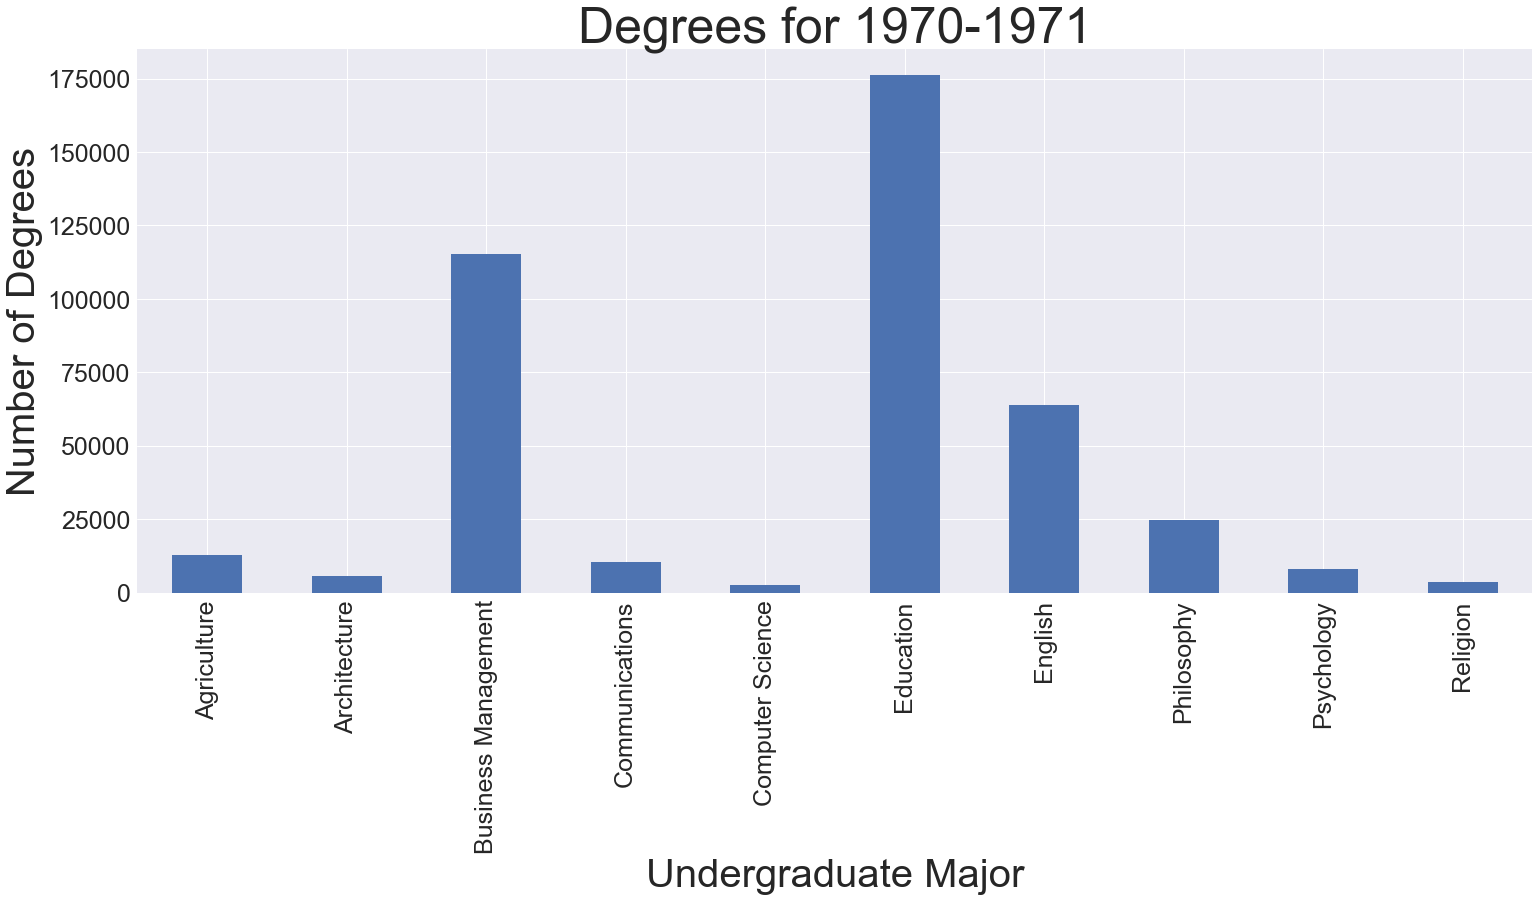

In [100]:
#Let's first plot the number of conferred degrees in the first year that we have to get form an initial idea of the data

#plotting number of degrees conferred in 1970-1971
plot_1971 = DF_degrees["1970-71"].plot(kind = "bar", figsize = (25,10), fontsize = 25)
plot_1971.set_title("Degrees for 1970-1971", fontsize = 50)
plot_1971.set_xlabel("Undergraduate Major", fontsize = 40)
plot_1971.set_ylabel("Number of Degrees", fontsize = 40)
plt.show()